In [1]:
# those variables will be updated by Mercury framework
# let's keep all variables to be updated in one cell
neighborhood = ''
stadsdeel = 'Centrum'

In [2]:
from IPython.display import Markdown as md
md("# Dashboard of Amsterdam neighbourhood: {}".format(neighborhood))

# Dashboard of Amsterdam neighbourhood: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
import geopandas as gpd
import shapely


In [4]:
geo_data = pd.read_csv("geodata_amsterdam.csv")

In [5]:
data = pd.read_csv('amsterdam_buurten.csv')

In [6]:
#Amsterdam
latitude = 52.377956
longitude = 4.8970

# create map and display it
m = folium.Map(width=500,
               location=[latitude, longitude], 
               zoom_start=11,
               zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)#, tiles='CartoDB positron')

def style_fn(feature):
    ss = {
        "fillColor": "red",
        "fillOpacity": 0.9,
        "weight": 0.9,
        "opacity": 1,
        "color": "black",
    }
    return ss
  
    
buurt_data = data[data['stadsdeel'] == stadsdeel]

buurtcoden = buurt_data.buurtcode.unique()

new_geodata = geo_data[geo_data['buurtcode'].isin(buurtcoden)]
 
new_geodata = new_geodata.copy()
new_geodata['geometry'] = new_geodata['geometry'].apply(lambda x: shapely.wkt.loads(x))
gdf = gpd.GeoDataFrame(data=new_geodata, geometry=new_geodata['geometry'], crs=4329)

folium.GeoJson(
    gdf.__geo_interface__,
    style_function=style_fn
).add_to(m)


# show map
display(m)

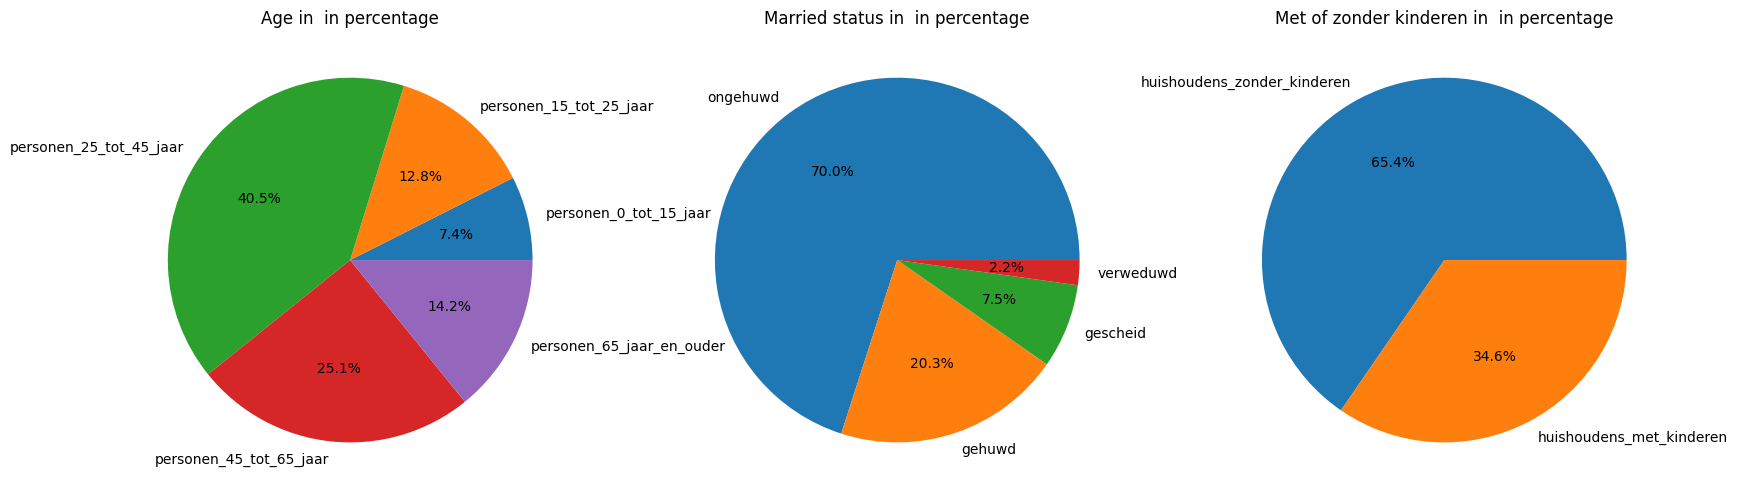

In [7]:
age_values = [buurt_data['percentage_personen_0_tot_15_jaar'].mean(),
 buurt_data['percentage_personen_15_tot_25_jaar'].mean(),
 buurt_data['percentage_personen_25_tot_45_jaar'].mean(),
 buurt_data['percentage_personen_45_tot_65_jaar'].mean(),
 buurt_data['percentage_personen_65_jaar_en_ouder'].mean()]
age_labels = ['personen_0_tot_15_jaar',
 'personen_15_tot_25_jaar',
 'personen_25_tot_45_jaar',
 'personen_45_tot_65_jaar',
 'personen_65_jaar_en_ouder']

married_status_labels = ['ongehuwd',
 'gehuwd',
 'gescheid',
 'verweduwd']
married_status_values = [buurt_data['percentage_ongehuwd'].mean(),
 buurt_data['percentage_gehuwd'].mean(),
 buurt_data['percentage_gescheid'].mean(),
 buurt_data['percentage_verweduwd'].mean()]

met_kinderen_labels = ['huishoudens_zonder_kinderen',
 'huishoudens_met_kinderen']
met_kinderen_values = [buurt_data['percentage_huishoudens_zonder_kinderen'].mean(),
 buurt_data['percentage_huishoudens_met_kinderen'].mean()]
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.pie(age_values, labels = age_labels, autopct='%1.1f%%')
ax1.set_title('Age in ' + neighborhood + " in percentage")
ax2.pie(married_status_values, labels = married_status_labels, autopct='%1.1f%%')
ax2.set_title('Married status in ' + neighborhood + " in percentage")
ax3.pie(met_kinderen_values, labels = met_kinderen_labels, autopct='%1.1f%%')
ax3.set_title('Met of zonder kinderen in ' + neighborhood + " in percentage")

plt.show()

In [8]:
met_kinderen_values


[23.808823529411764, 12.588235294117647]

In [9]:
data.columns.to_list()

['buurtcode',
 'buurtnaam',
 'wijkcode',
 'bevolkingsdichtheid_inwoners_per_km2',
 'aantal_inwoners',
 'mannen',
 'vrouwen',
 'percentage_personen_0_tot_15_jaar',
 'percentage_personen_15_tot_25_jaar',
 'percentage_personen_25_tot_45_jaar',
 'percentage_personen_45_tot_65_jaar',
 'percentage_personen_65_jaar_en_ouder',
 'percentage_ongehuwd',
 'percentage_gehuwd',
 'percentage_gescheid',
 'percentage_verweduwd',
 'geboortes_per_1000_inwoners',
 'aantal_huishoudens',
 'percentage_eenpersoonshuishoudens',
 'percentage_huishoudens_zonder_kinderen',
 'percentage_huishoudens_met_kinderen',
 'gemiddelde_huishoudsgrootte',
 'percentage_westerse_migratieachtergrond',
 'percentage_niet_westerse_migratieachtergrond',
 'percentage_uit_marokko',
 'percentage_uit_nederlandse_antillen_en_aruba',
 'percentage_uit_suriname',
 'percentage_uit_turkije',
 'percentage_overige_nietwestersemigratieachtergrond',
 'aantal_bedrijven_landbouw_bosbouw_visserij',
 'aantal_bedrijven_nijverheid_energie',
 'aantal_b